In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy
import matplotlib.ticker as ticker
import matplotlib as mpl
import itertools
%matplotlib notebook

datadirec = '/Volumes/lab-goehringn/home/users/blandt/ModelData/dimer_kinetic_pPAR_dimerisation_only_e_beta_scheme3/'

In [2]:
koff_vals = [0.001, 0.01]
kant_vals = [0.005, 0.01, 0.1, 1]
koff_kant_vals = list(itertools.product(koff_vals, kant_vals))

dosages = [0.2, 0.4, 0.6, 0.8, 1]
ant_imbalances = [0.1, 0.25, 0.5, 0.75, 1]
koff_kant_dosages = list(itertools.product(koff_vals, kant_vals, dosages))
koff_kant_ant_imbalances = list(itertools.product(koff_vals, kant_vals, ant_imbalances))

p1_range = (0.01, 0.99)  # frac
p2_range = (0, 1)  # beta

aspect = 1

### Dosage plot

In [14]:
def dosage_plot(n):

    # Import data
    res0 = (np.loadtxt(datadirec + str(n) + '/Res.txt') == 2).astype(float)
    res1 = (np.loadtxt(datadirec + str(n + 1) + '/Res.txt') == 2).astype(float)
    res2 = (np.loadtxt(datadirec + str(n + 2) + '/Res.txt') == 2).astype(float)
    res3 = (np.loadtxt(datadirec + str(n + 3) + '/Res.txt') == 2).astype(float)
    res4 = (np.loadtxt(datadirec + str(n + 4) + '/Res.txt') == 2).astype(float)
    restotal = res0 + res1 + res2 + res3 + res4
    restotal[restotal == 0] = np.nan

    # Plot
    fig, ax = plt.subplots()
    ax.imshow(restotal.T, origin='lower', vmin=1, vmax=5, 
              extent=(p1_range[0], p1_range[1], p2_range[0], p2_range[1]), aspect=aspect, cmap='cividis')
    
    ax.set_xlabel(r'$\epsilon$')
    ax.set_ylabel(r'$\beta$')
    ax.set_xticks([0.01, 0.25, 0.5, 0.75, 0.99])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.tick_params(axis='both', labelsize=8)
    fig.set_size_inches(2.5, 2.5)
    fig.tight_layout()
    return fig, ax

koff = 0.001, kant = 0.005
0


<IPython.core.display.Javascript object>


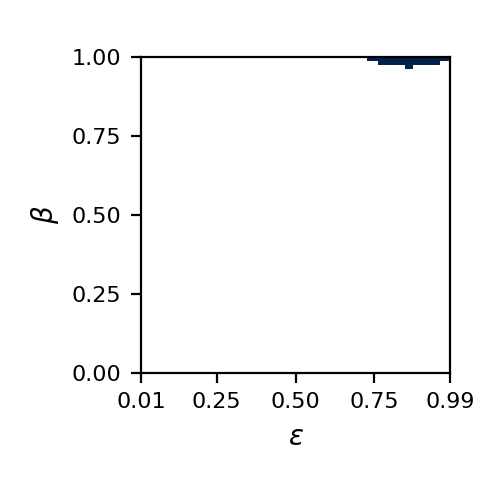

koff = 0.001, kant = 0.01
5


<IPython.core.display.Javascript object>


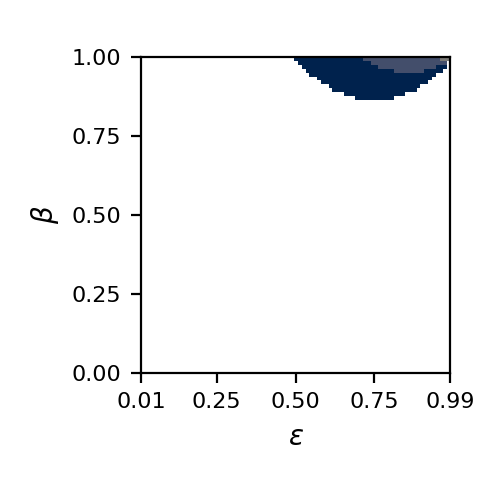

koff = 0.001, kant = 0.1
10


<IPython.core.display.Javascript object>


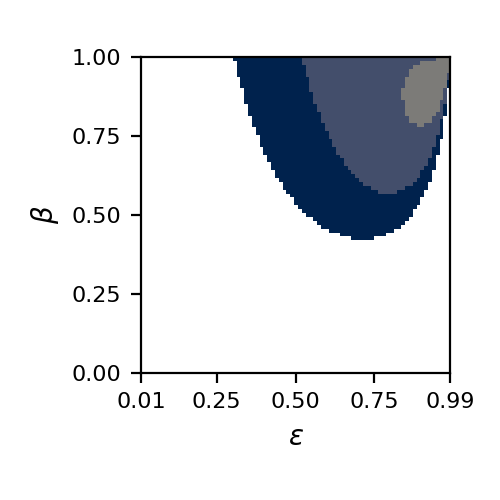

koff = 0.001, kant = 1
15


<IPython.core.display.Javascript object>


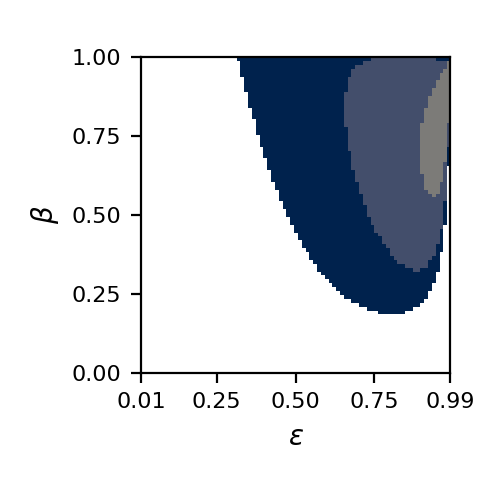

koff = 0.01, kant = 0.005
20


<IPython.core.display.Javascript object>


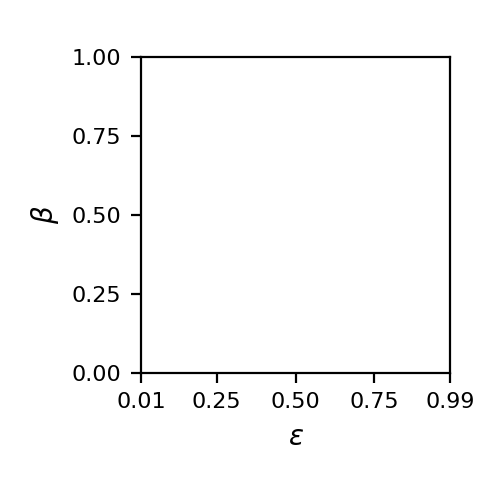

koff = 0.01, kant = 0.01
25


<IPython.core.display.Javascript object>


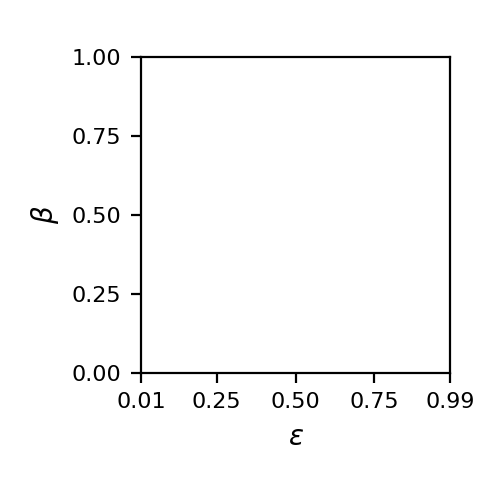

koff = 0.01, kant = 0.1
30


<IPython.core.display.Javascript object>


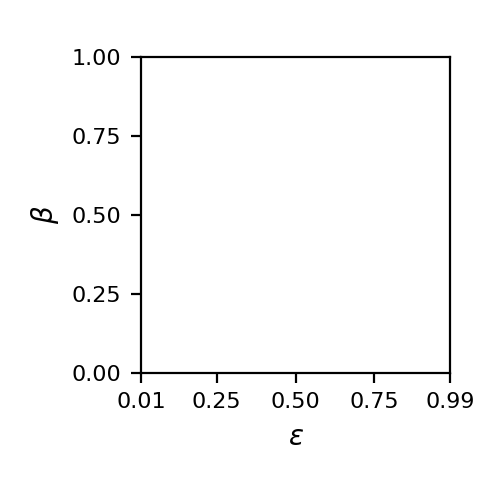

koff = 0.01, kant = 1
35


<IPython.core.display.Javascript object>


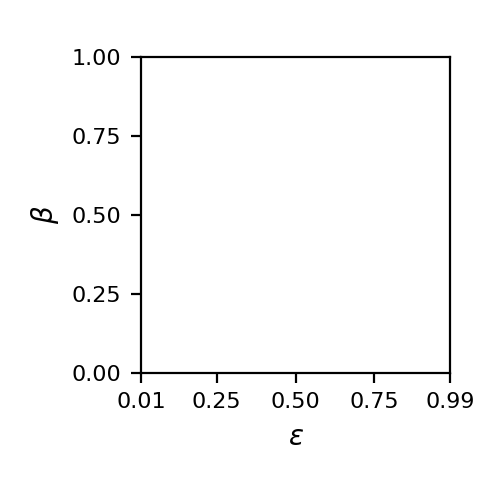

In [4]:
for i, (koff, kant) in enumerate(koff_kant_vals):
    n = len(dosages) * i
    print('koff = %s, kant = %s' % (koff, kant))
    print(n)
    dosage_plot(n=n)

### ASI plot

In [15]:
def asi_plot(n):

    # Import data
    res = np.loadtxt(datadirec + str(n) + '/Res.txt')
    res[res == 1] = np.nan

    # Plot
    fig, ax = plt.subplots()
    
    ax.imshow(res.T, origin='lower', vmin=1, vmax=6, 
              extent=(p1_range[0], p1_range[1], p2_range[0], p2_range[1]), aspect=aspect, cmap='viridis')
    
    ax.set_xlabel(r'$\epsilon$')
    ax.set_ylabel(r'$\beta$')
    ax.tick_params(axis='both', labelsize=8)
    ax.set_xticks([0.01, 0.25, 0.5, 0.75, 0.99])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    fig.set_size_inches(2.5, 2.5)
    fig.tight_layout()
    return fig, ax

koff = 0.001, kant = 0.005
40


<IPython.core.display.Javascript object>


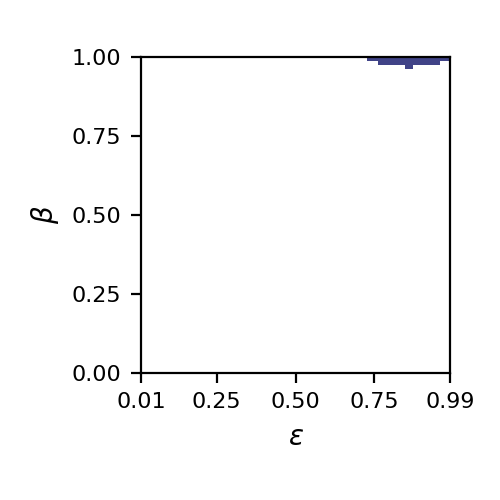

koff = 0.001, kant = 0.01
41


<IPython.core.display.Javascript object>


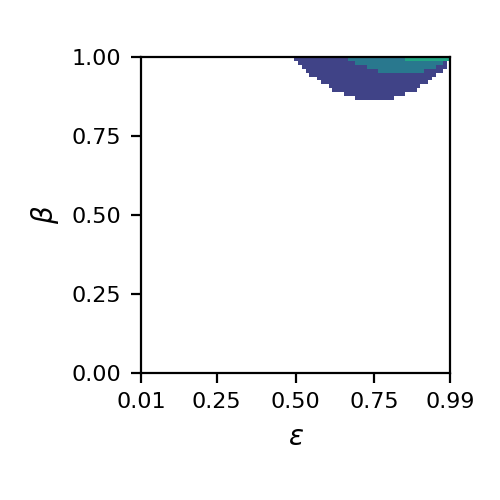

koff = 0.001, kant = 0.1
42


<IPython.core.display.Javascript object>


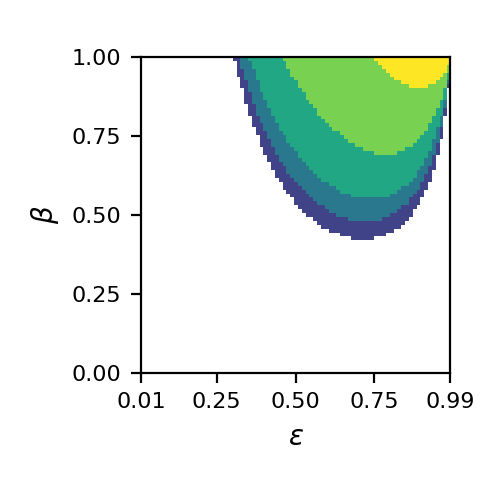

koff = 0.001, kant = 1
43


<IPython.core.display.Javascript object>


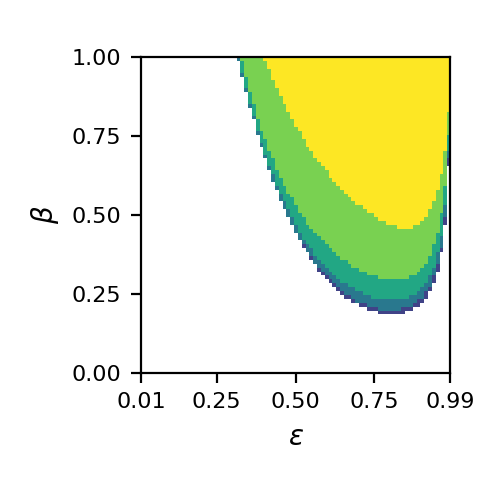

koff = 0.01, kant = 0.005
44


<IPython.core.display.Javascript object>


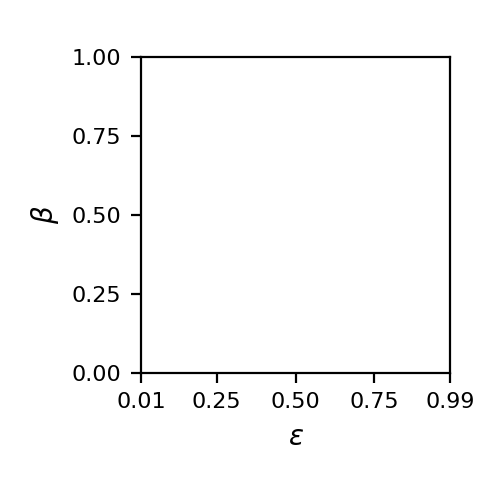

koff = 0.01, kant = 0.01
45


<IPython.core.display.Javascript object>


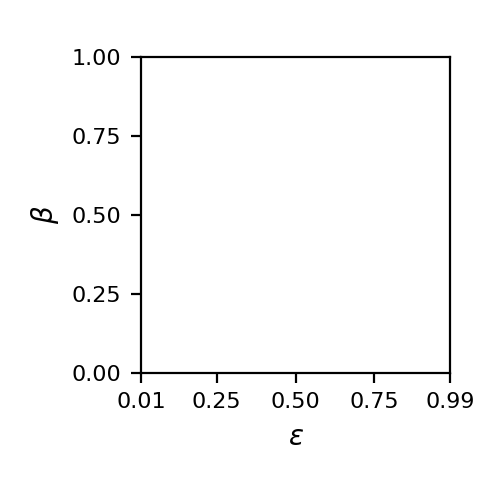

koff = 0.01, kant = 0.1
46


<IPython.core.display.Javascript object>


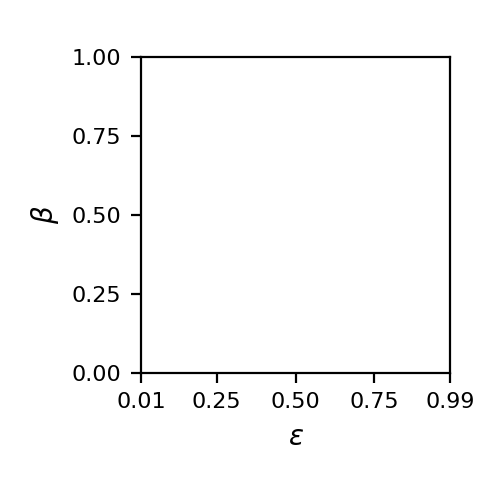

koff = 0.01, kant = 1
47


<IPython.core.display.Javascript object>


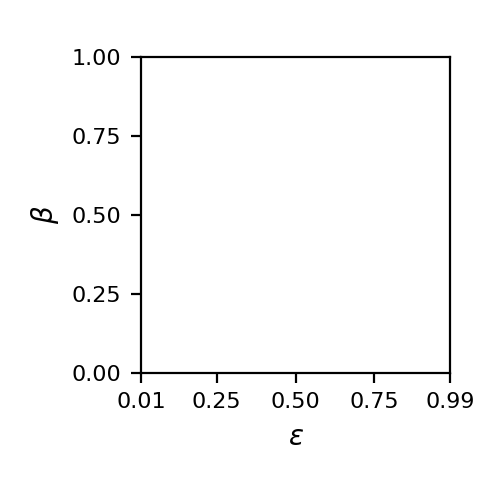

In [6]:
for i, (koff, kant) in enumerate(koff_kant_vals):
    n=len(koff_kant_dosages) + i
    print('koff = %s, kant = %s' % (koff, kant))
    print(n)
    asi_plot(n=n)

### Trigger plot

In [21]:
def trigger_plot(n1, n2):

    # Import data
    res1 = (np.loadtxt(datadirec + str(n1) + '/Res.txt') == 2).astype(float)
    res2 = (np.loadtxt(datadirec + str(n2) + '/Res.txt') == 2).astype(float)
    restotal = res1 + res2
    restotal[restotal == 0] = np.nan

    # Set up cmap
    colours = {1: 'green', 2: 'grey'}
    cmap = mpl.colors.ListedColormap(list(colours.values()))
    norm = mpl.colors.BoundaryNorm(list(colours.keys()) + [100], cmap.N)

    # Plot
    fig, ax = plt.subplots()
    ax.imshow(restotal.T, origin='lower', vmin=0, vmax=2, 
              extent=(p1_range[0], p1_range[1], p2_range[0], p2_range[1]), aspect=aspect, cmap=cmap, norm=norm,
              alpha=0.5)
    
    ax.set_xlabel('Dimerisation ' + r'$(\epsilon)$')
    ax.set_ylabel('Dimer resistance ' + r'$(\beta)$')
    ax.set_xticks([0.01, 0.25, 0.5, 0.75, 0.99])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.tick_params(axis='both', labelsize=8)
    fig.set_size_inches(2.5, 2.5)
    fig.tight_layout()
    return fig, ax

koff = 0.001, kant = 0.005
4 48


<IPython.core.display.Javascript object>


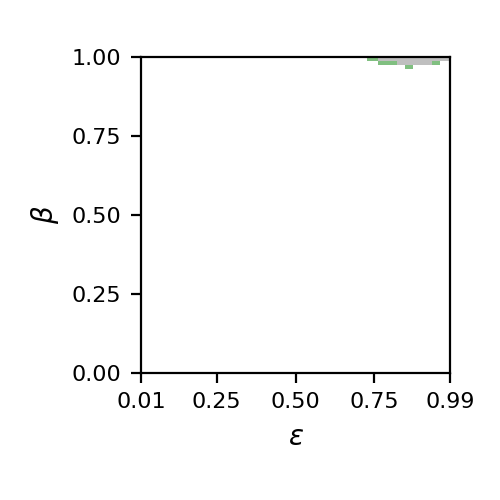

/Users/blandt/anaconda3/anaconda3/envs/model/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


koff = 0.001, kant = 0.01
9 49


<IPython.core.display.Javascript object>


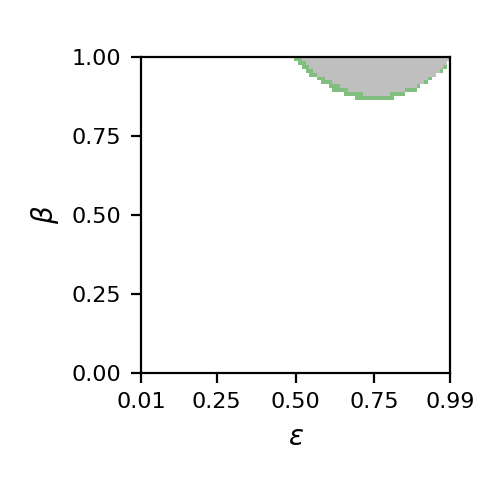

koff = 0.001, kant = 0.1
14 50


<IPython.core.display.Javascript object>


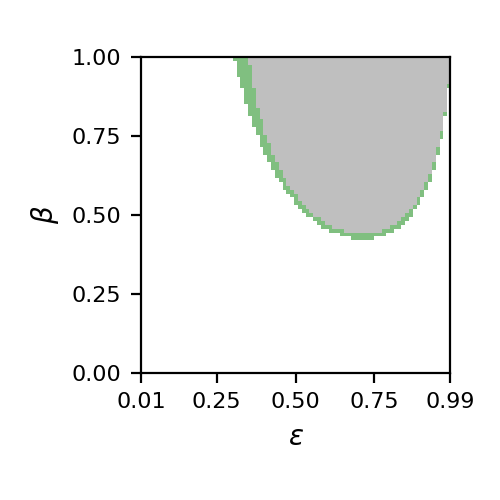

koff = 0.001, kant = 1
19 51


<IPython.core.display.Javascript object>


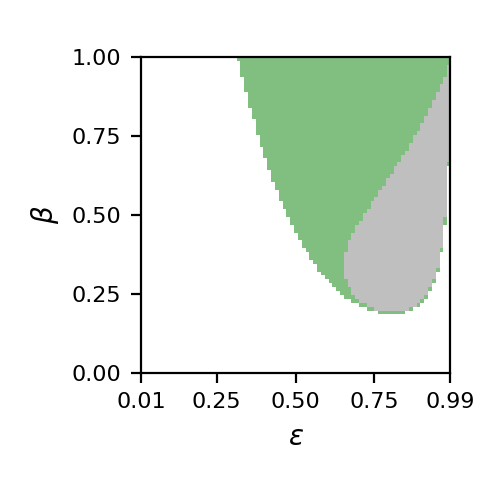

koff = 0.01, kant = 0.005
24 52


/Users/blandt/anaconda3/anaconda3/envs/model/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


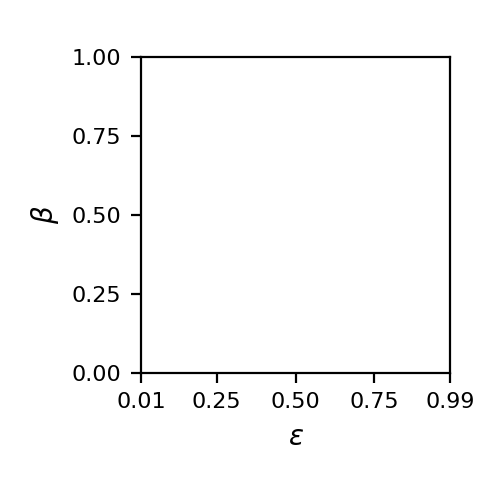

koff = 0.01, kant = 0.01
29 53


<IPython.core.display.Javascript object>


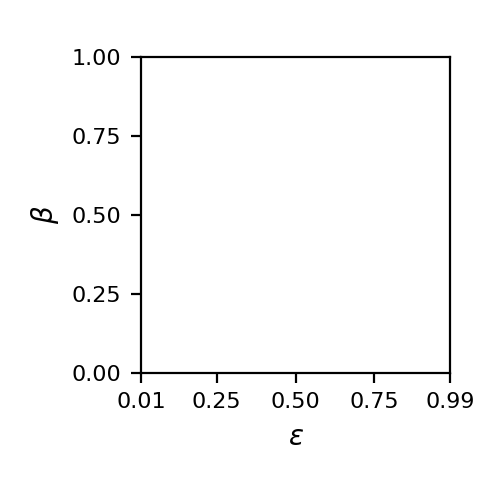

koff = 0.01, kant = 0.1
34 54


<IPython.core.display.Javascript object>


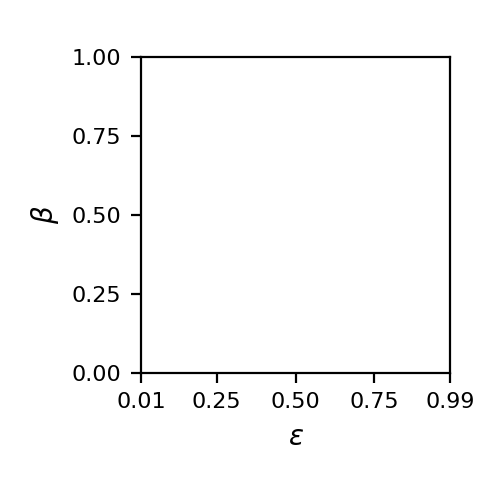

koff = 0.01, kant = 1
39 55


<IPython.core.display.Javascript object>


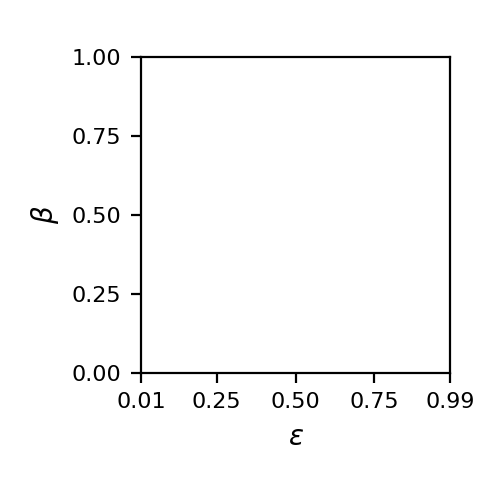

In [8]:
for i, (koff, kant) in enumerate(koff_kant_vals):
    n1 = len(dosages) * i + (len(dosages) - 1)
    n2 = len(koff_kant_dosages) + len(koff_kant_vals) + i
    print('koff = %s, kant = %s' % (koff, kant))
    print(n1, n2)
    trigger_plot(n1=n1, n2=n2)

### Antagonism plot

In [17]:
def antagonism_plot(n):

    # Import data
    res0 = (np.loadtxt(datadirec + str(n) + '/Res.txt') == 2).astype(float)
    res1 = (np.loadtxt(datadirec + str(n + 1) + '/Res.txt') == 2).astype(float)
    res2 = (np.loadtxt(datadirec + str(n + 2) + '/Res.txt') == 2).astype(float)
    res3 = (np.loadtxt(datadirec + str(n + 3) + '/Res.txt') == 2).astype(float)
    res4 = (np.loadtxt(datadirec + str(n + 4) + '/Res.txt') == 2).astype(float)
    restotal = res0 + res1 + res2 + res3 + res4
    restotal[restotal == 0] = np.nan

    # Plot
    fig, ax = plt.subplots()
    ax.imshow(restotal.T, origin='lower', vmin=1, vmax=5, 
              extent=(p1_range[0], p1_range[1], p2_range[0], p2_range[1]), aspect=aspect, cmap='plasma')
    
    ax.set_xlabel(r'$\epsilon$')
    ax.set_ylabel(r'$\beta$')
    ax.set_xticks([0.01, 0.25, 0.5, 0.75, 0.99])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.tick_params(axis='both', labelsize=8)
    fig.set_size_inches(2.5, 2.5)
    fig.tight_layout()
    return fig, ax

In [13]:
# for i, (koff, kant) in enumerate(koff_kant_vals):
#     n = len(koff_kant_dosages) + 2 * len(koff_kant_vals) + len(ant_imbalances) * i
#     print('koff = %s, kant = %s' % (koff, kant))
#     print(n)
#     antagonism_plot(n=n)

### Figures for thesis

<IPython.core.display.Javascript object>


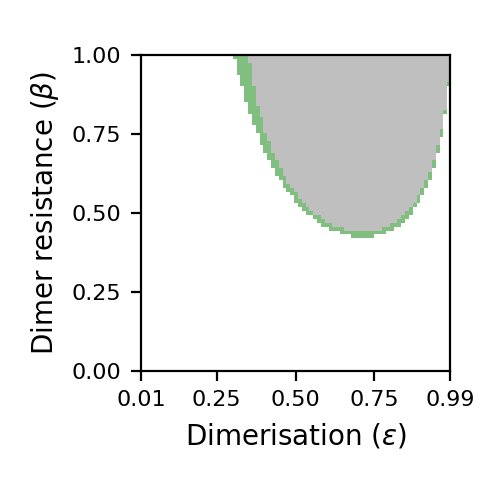

/Users/blandt/anaconda3/anaconda3/envs/model/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


In [30]:
# alpha = 100, theta = 0.1

fig, ax = trigger_plot(n1=14, n2=50)
fig.savefig('Figs/trigger_plot_high_affinity_low_antagonism.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


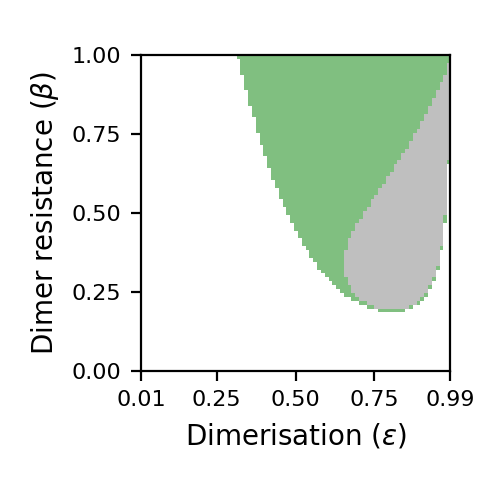

/Users/blandt/anaconda3/anaconda3/envs/model/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


In [31]:
# alpha = 100, theta = 1

fig, ax = trigger_plot(n1=19, n2=51)
fig.savefig('Figs/trigger_plot_high_affinity_high_antagonism.png', dpi=600, transparent=True)

In [26]:
# fig, ax = dosage_plot(n=15)

In [27]:
# fig, ax = asi_plot(n=43)